In [1]:
%pylab inline
import matplotlib.pyplot as plt
from foof import syn
from foof.fit import FOOF
import numpy as np
import os
import scipy.io
import scipy.signal
import pandas as pd
import bisect
from foof import syn

Populating the interactive namespace from numpy and matplotlib


In [2]:
p = '/Users/Torben/Documents/nsaba_foof/Subject1_PSD_Sensor_0-500Hz.mat'
dat = scipy.io.loadmat(p)
freqs = np.squeeze(dat['Freqs'])
psds = np.squeeze(dat['TF'])
print len(psds)

272


In [3]:
all_cfs = [];
all_chi = [];
chis_w_high_cf = [];
for x in xrange(len(psds)):
    foof = FOOF(min_p=0.1,res = freqs[1]-freqs[0])
    temp_psd= np.expand_dims(psds[x,bisect.bisect(freqs,3):bisect.bisect(freqs,50)-1].T,axis=1)
    foof.model(freqs[bisect.bisect(freqs,3):bisect.bisect(freqs,50)-1],temp_psd)
    all_cfs.extend(foof.centers_)
    for i in foof.centers_:
        if i > 40:
            chis_w_high_cf.append(foof.chi_)
            break
    all_chi.append(foof.chi_)
    #plt.plot(freqs[bisect.bisect(freqs,3):bisect.bisect(freqs,50)-1],log(temp_psd))

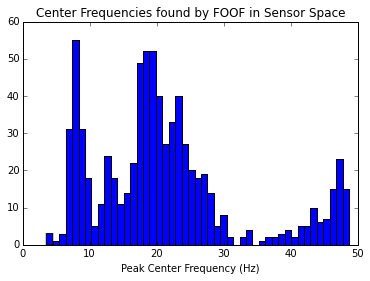

In [4]:
plt.hist(all_cfs,47)
plt.title('Center Frequencies found by FOOF in Sensor Space')
plt.xlabel('Peak Center Frequency (Hz)')

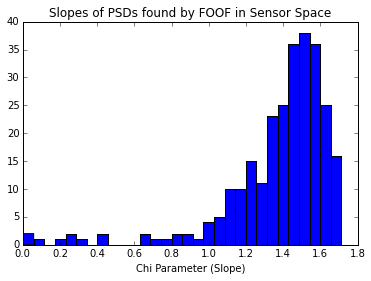

In [7]:
plt.hist(all_chi,30)
plt.title('Slopes of PSDs found by FOOF in Sensor Space')
plt.xlabel('Chi Parameter (Slope)')

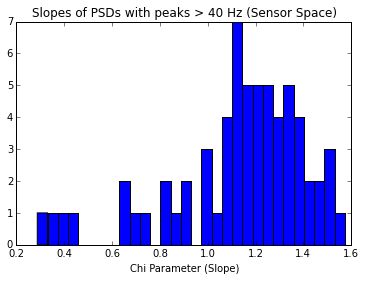

In [8]:
plt.hist(chis_w_high_cf,30)
plt.title('Slopes of PSDs with peaks > 40 Hz (Sensor Space)')
plt.xlabel('Chi Parameter (Slope)')